In [ ]:
# 4. Write a program to simulate a binary bandit problem, where each action has a binary (0 or 1) reward. It
# should use the upper confidence bound algorithm to estimate action values and make decisions based on
# the highest estimated value.

# Name: Devashish Mayur Potnis
# Class: BE-AIML

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def ucb_bandit(num_actions, true_action_values, num_steps, exploration_param):
    action_values = np.zeros(num_actions)  # Estimated action values
    action_counts = np.zeros(num_actions)  # Counts of each action taken
    rewards = np.zeros(num_steps)  # Accumulated rewards over time
    estimated_values_log = np.zeros((num_steps, num_actions))  # Log estimated values for each action at each step
    for step in range(num_steps):
        # UCB formula to choose action
        ucb_values = action_values + exploration_param * np.sqrt(np.log(step + 1) / (action_counts + 1e-6))
        action = np.argmax(ucb_values)
        # Get the binary reward for the chosen action (0 or 1)
        reward = np.random.choice([0, 1], p=[1 - true_action_values[action], true_action_values[action]])
        # Update action values and counts
        action_counts[action] += 1
        action_values[action] += (reward - action_values[action]) / action_counts[action]
        # Store the reward and estimated values for plotting
        rewards[step] = reward
        estimated_values_log[step, :] = action_values
    return rewards, estimated_values_log
def run_binary_bandit(num_actions, true_action_values, num_steps, num_runs, exploration_param):
    average_rewards = np.zeros(num_steps)
    total_estimated_values_log = np.zeros((num_steps, num_actions))
    for _ in range(num_runs):
        rewards, estimated_values_log = ucb_bandit(num_actions, true_action_values, num_steps, exploration_param)
        average_rewards += (rewards - average_rewards) / (np.arange(num_steps) + 1)
        total_estimated_values_log += estimated_values_log
    # Calculate the average estimated values
    average_estimated_values_log = total_estimated_values_log / num_runs
    return average_rewards, average_estimated_values_log
if __name__ == "__main__":
    np.random.seed(42)
    # Problem setup
    num_actions = 5
    true_action_values = np.random.rand(num_actions)  # True action values as random probabilities
    exploration_param = 2.0  # UCB exploration parameter
    num_steps = 1000
    num_runs = 2000
    # Run UCB algorithm
    average_rewards, average_estimated_values_log = run_binary_bandit(num_actions, true_action_values, num_steps, num_runs, exploration_param)
    

In [3]:
# Print the estimated values at each step
for step in range(num_steps):
    print(f"Step {step + 1}: Estimated Values =", average_estimated_values_log[step])

Step 1: Estimated Values = [0.3905 0.     0.     0.     0.    ]
Step 2: Estimated Values = [0.3905 0.953  0.     0.     0.    ]
Step 3: Estimated Values = [0.3905 0.953  0.748  0.     0.    ]
Step 4: Estimated Values = [0.3905 0.953  0.748  0.588  0.    ]
Step 5: Estimated Values = [0.3905 0.953  0.748  0.588  0.156 ]
Step 6: Estimated Values = [0.26875 0.93575 0.7455  0.58775 0.156  ]
Step 7: Estimated Values = [0.26883333 0.92566667 0.68641667 0.56875    0.1505    ]
Step 8: Estimated Values = [0.27675    0.9225     0.64833333 0.50808333 0.12883333]
Step 9: Estimated Values = [0.28125    0.92583333 0.66375    0.4735     0.1015    ]
Step 10: Estimated Values = [0.3055     0.92683333 0.66758333 0.50533333 0.08883333]
Step 11: Estimated Values = [0.32908333 0.93125    0.68291667 0.545      0.10425   ]
Step 12: Estimated Values = [0.35229167 0.93316667 0.68791667 0.55575    0.13175   ]
Step 13: Estimated Values = [0.34675    0.932125   0.69204167 0.55520833 0.14516667]
Step 14: Estimated 

Step 476: Estimated Values = [0.35962411 0.95060415 0.72584284 0.58822884 0.1445046 ]
Step 477: Estimated Values = [0.35961814 0.95059686 0.72581042 0.58818891 0.14448417]
Step 478: Estimated Values = [0.3596284  0.95060229 0.72577102 0.58822859 0.14440998]
Step 479: Estimated Values = [0.35978784 0.95058772 0.72574652 0.58822518 0.14439147]
Step 480: Estimated Values = [0.35974212 0.95059438 0.72567186 0.58821543 0.14437939]
Step 481: Estimated Values = [0.3596975  0.95059797 0.72566479 0.58826928 0.14438733]
Step 482: Estimated Values = [0.35979033 0.95057863 0.72571452 0.58823666 0.14436744]
Step 483: Estimated Values = [0.35977141 0.9505525  0.72574738 0.58828413 0.14436859]
Step 484: Estimated Values = [0.35980214 0.95058511 0.72577751 0.5882355  0.1444272 ]
Step 485: Estimated Values = [0.35984704 0.95060117 0.72580194 0.58819516 0.14443577]
Step 486: Estimated Values = [0.3598396  0.95061177 0.72578941 0.58823951 0.14444209]
Step 487: Estimated Values = [0.35975281 0.95061285 0.

Step 943: Estimated Values = [0.36288269 0.95061768 0.72719116 0.59011754 0.14684117]
Step 944: Estimated Values = [0.36283974 0.95062228 0.72723791 0.59011856 0.14681352]
Step 945: Estimated Values = [0.36286331 0.95062955 0.72724297 0.59010684 0.14685776]
Step 946: Estimated Values = [0.3628293  0.95062369 0.72725735 0.59011979 0.14683994]
Step 947: Estimated Values = [0.36280734 0.9506257  0.7272691  0.59013606 0.14683319]
Step 948: Estimated Values = [0.36281197 0.95061135 0.72727687 0.59011548 0.14680101]
Step 949: Estimated Values = [0.36276616 0.95061781 0.72728006 0.59011263 0.14677995]
Step 950: Estimated Values = [0.36276296 0.95061761 0.72728475 0.5900776  0.14678465]
Step 951: Estimated Values = [0.3627519  0.95061113 0.72729338 0.59007523 0.14677885]
Step 952: Estimated Values = [0.36274051 0.9506109  0.72732819 0.59004674 0.14678924]
Step 953: Estimated Values = [0.36268239 0.95061796 0.72731923 0.59003696 0.14679227]
Step 954: Estimated Values = [0.36265746 0.95061388 0.

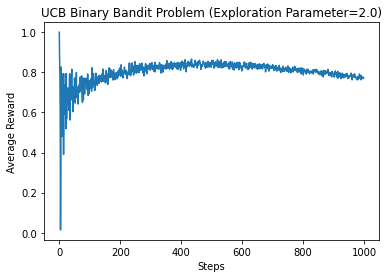

In [4]:
# Plot the results
plt.plot(average_rewards)
plt.title(f"UCB Binary Bandit Problem (Exploration Parameter={exploration_param})")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.show()
